In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import count_visit_TRA

In [2]:
typhoon_date = pd.read_excel( 'Typhoon_date.xlsx' )['日期']

In [3]:
typhoon_date = [date.to_pydatetime() for date in typhoon_date ]

In [4]:
transCnt_dict = count_visit_TRA.get_trCnt()

# Whole 

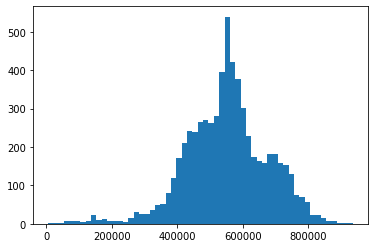

In [5]:
_ = plt.hist( transCnt_dict.values(), bins='auto' )

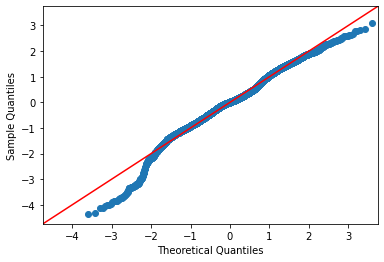

In [6]:
fig = sm.qqplot( np.array( list(transCnt_dict.values() ) ), stats.norm, fit=True, line = '45' ) 

# Typhoon day

In [45]:
usual_situa_trCnt = cp.deepcopy( transCnt_dict ) 

In [46]:
for date in typhoon_date : 
    try :
        del usual_situa_trCnt[date]
    except : 
        continue

In [257]:
def self_qqplot( glo_data:dict, year_split )-> None :
    data = [( date, glo_data[date] ) for date in glo_data.keys()]
    data = sorted( data, key = lambda i : i[1] ) 
    temp = []
    for date, cnt in data : 
        temp.append( np.array( [date.year, cnt ] ) ) 
    temp = np.array( temp )
    mean = np.mean( temp.T[1] )
    sigma = temp.T[1].std( ddof = 1 )

    nd = stats.norm( mean, sigma )
    percent = 0 
    single_percent = 1 / len( data ) 
    
    theo = []
    for i in range( len( data ) ) :
        theo.append( nd.ppf( percent ) )
        percent += single_percent
     
    year = list( temp.T[0] ) 
    cnt = list( temp.T[1] )

    before_pair = []
    after_pair = []
    for i in range( len( year ) ) :
        if year[i] >= year_split : 
            after_pair.append( np.array( [cnt[i], theo[i]] ) )
        else : 
            before_pair.append( np.array( [cnt[i], theo[i]] ) )
    before_pair = np.array( before_pair ) 
    after_pair = np.array( after_pair )

    fig, ax = plt.subplots( figsize = ( 15, 10 ) )
    plt.scatter( before_pair.T[1], before_pair.T[0], c='b', s = 2.5, alpha = 1 )
    plt.scatter( after_pair.T[1], after_pair.T[0], c='r', s=2.5, alpha = 0.3  )
    ax.plot(ax.get_xlim(), ax.get_xlim(),color = "black", alpha = 0.3)
    plt.xlim( 0, 1300000 )
    plt.ylim( 0, 1300000 )
    '''
    plt.scatter( theo, temp.T[1], marker='o', c = temp.T[0] )
    '''

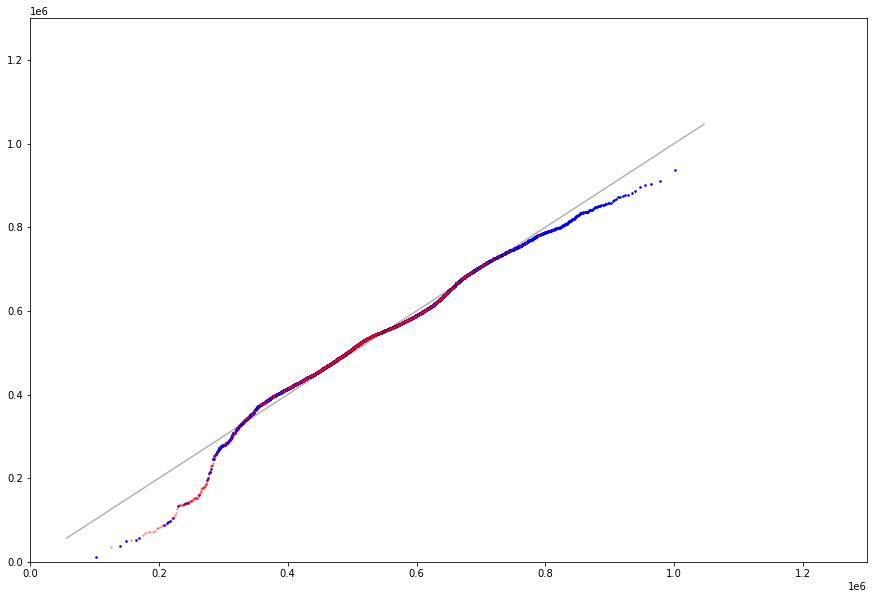

In [258]:
self_qqplot( transCnt_dict, 2020 )

In [86]:
def get_year_data( trCntDict:dict, years:list ) :
    temptrCnt = dict()
    for date in trCntDict : 
        if date.year in years :
            temptrCnt[date] = trCntDict[date]

    return temptrCnt 

In [87]:
year_before_2020 = get_year_data( usual_situa_trCnt, range( 2005, 2020 ) ) 
year_after_2020 = get_year_data( usual_situa_trCnt, range( 2020, 2023 ) ) 

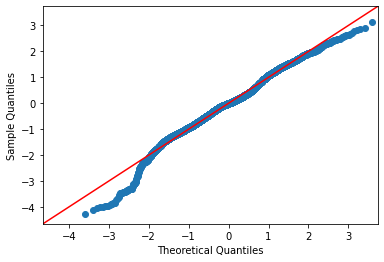

In [24]:
fig = sm.qqplot( np.array( list(usual_situa_trCnt.values() ) ), stats.norm, fit=True, line = '45' ) 

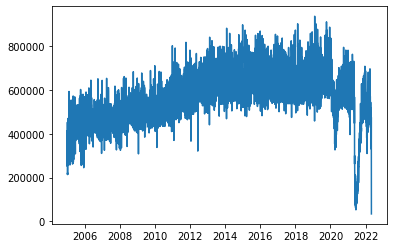

In [15]:
plt.plot( usual_situa_trCnt.keys(), usual_situa_trCnt.values())